In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from scipy.stats import uniform as sp_uniform
from scipy.stats import randint as sp_randint

import warnings
warnings.filterwarnings("ignore")

Problem 1

a)

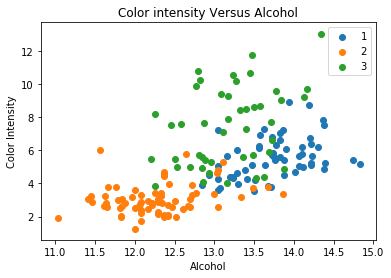

In [2]:
data = pd.read_csv('data/strongdrink.txt', na_values = '?')
for cultivar, group in data.groupby(['cultivar']):
    plt.scatter(group['alco'], group['color_int'],label = cultivar)

plt.legend()
plt.xlabel("Alcohol")
plt.ylabel("Color Intensity")
plt.title("Color intensity Versus Alcohol")
plt.show()

b)

In [3]:
X = data[['alco','malic','tot_phen','color_int']]
y = data['cultivar']

LogReg = LogisticRegression()
param_dist1 = {'penalty': ['l1', 'l2'], 'C': sp_uniform(0.1, 10.0)}
random_search1 = RandomizedSearchCV(LogReg, param_distributions = param_dist1, 
                                 n_iter = 100, n_jobs = -1, cv = 5, random_state = 25, scoring = 'neg_mean_squared_error')
random_search1.fit(X, y)

print('Optimal tuning parameter values are\n', random_search1.best_params_)
print('MSE =', abs(random_search1.best_score_))

Optimal tuning parameter values are
 {'C': 2.665871587495725, 'penalty': 'l1'}
MSE = 0.11931818181818182


c)

In [4]:
param_dist2 = {'n_estimators': [10, 200],
               'max_depth': [2, 4],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 4)}
random_search2 = RandomizedSearchCV(RandomForestClassifier(), param_dist2, 
                                   n_iter=100, n_jobs=-1, cv=4, random_state=25, scoring='neg_mean_squared_error')

random_search2.fit(X, y)

print('Optimal tuning parameter values are\n', random_search2.best_params_)
print('MSE =', abs(random_search2.best_score_))


Optimal tuning parameter values are
 {'max_depth': 4, 'max_features': 1, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 200}
MSE = 0.1534090909090909


d)

In [5]:
param_dist3 = {'C': sp_uniform(loc=0.1, scale=10.0),
               'gamma': ['scale', 'auto'],
               'shrinking': [True, False]}
random_search3 = RandomizedSearchCV(SVC(), param_dist3, 
                                n_iter=100, n_jobs=-1, cv=4, random_state=25, scoring='neg_mean_squared_error')

random_search3.fit(X, y)
print('Optimal tuning parameter values are\n', random_search3.best_params_)
print('MSE =', abs(random_search3.best_score_))

Optimal tuning parameter values are
 {'C': 1.790414563978564, 'gamma': 'scale', 'shrinking': True}
MSE = 0.1534090909090909


e)

In [6]:
param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100),
               'activation': ['logistic', 'relu'],
               'alpha': sp_uniform(0.1, 10.0)}
random_search4 = RandomizedSearchCV(MLPClassifier(), param_dist4, 
                                n_iter=100, n_jobs=-1, cv=4, random_state=25, scoring='neg_mean_squared_error')

random_search4.fit(X, y)
print('Optimal tuning parameter values are\n', random_search4.best_params_)
print('MSE =', abs(random_search4.best_score_))


Optimal tuning parameter values are
 {'activation': 'logistic', 'alpha': 0.5296878218210631, 'hidden_layer_sizes': 88}
MSE = 0.23295454545454544


f)

Among all four models (logistic regression, random forest, SVM and neural network), I think logistic regression is the best model to predict cultivar because it has the lowest MSE.

Among the three models above (random forest, SVM and neural network), I think random forest and SVC are equally well in predicting cultivar because the MSE values of the two models are the same, and they are better than neural network because their MSE values is lower than that of neural network model.